## Detection of Parkinson Disease Using Audio Data

This notebook contains the neccessary coding involved for the completion of COMP6016 Project. The selected project is the detection of Parkinson disease using machine learning techniques.


## Importing the Libraries and the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
df = pd.read_csv('dataset/Parkinsson disease.csv')

In [3]:
## Reading the dataset

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


All the features present in this table are explained thoroughly in the report document. 

## Pre-processing the dataset

In [5]:
## Checking for the shape of the dataset
df.shape

(195, 24)

We can see that there are total of 195 rows and 24 columns present in the data. Each of the column represents different features of the data.

In [6]:
## Checking for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:

## Statistical measure of the feature presenet in the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Here, the status column is our target column and represents whether a person is affected by Parkinson syndrome or not. '0' represents the person isn't affected by the Parkinson while '1' represents that the person is affected by the Parkinson syndrome.

In [8]:
## Checking the distribution of the status column
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

So, we can see that there are 147 rows containing information of those patients who are suffering from Parkinson.

<Axes: xlabel='status'>

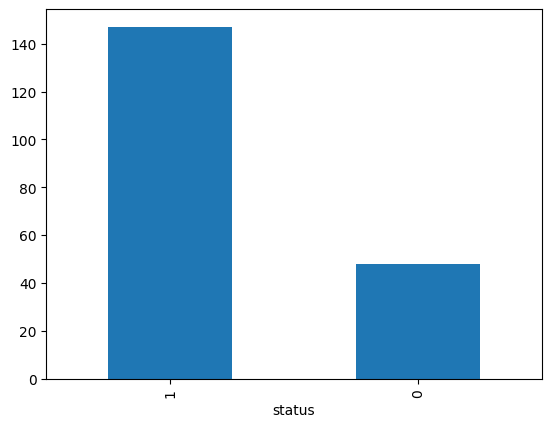

In [9]:
## Representing it using the bar graph
df['status'].value_counts().plot(kind = 'bar')

## Exploratory Data Analysis(EDA)

In [10]:
df.drop('name', axis = 1).groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [11]:
## Seperating the dependent and independent variable
X = df.drop(['name','status'], axis = 1)
Y = df['status']

Here, we have separated the target column from the rest of the dataset. Similary, the name column is also dropped, as this feature wont have any significance while training a machine learning model. 

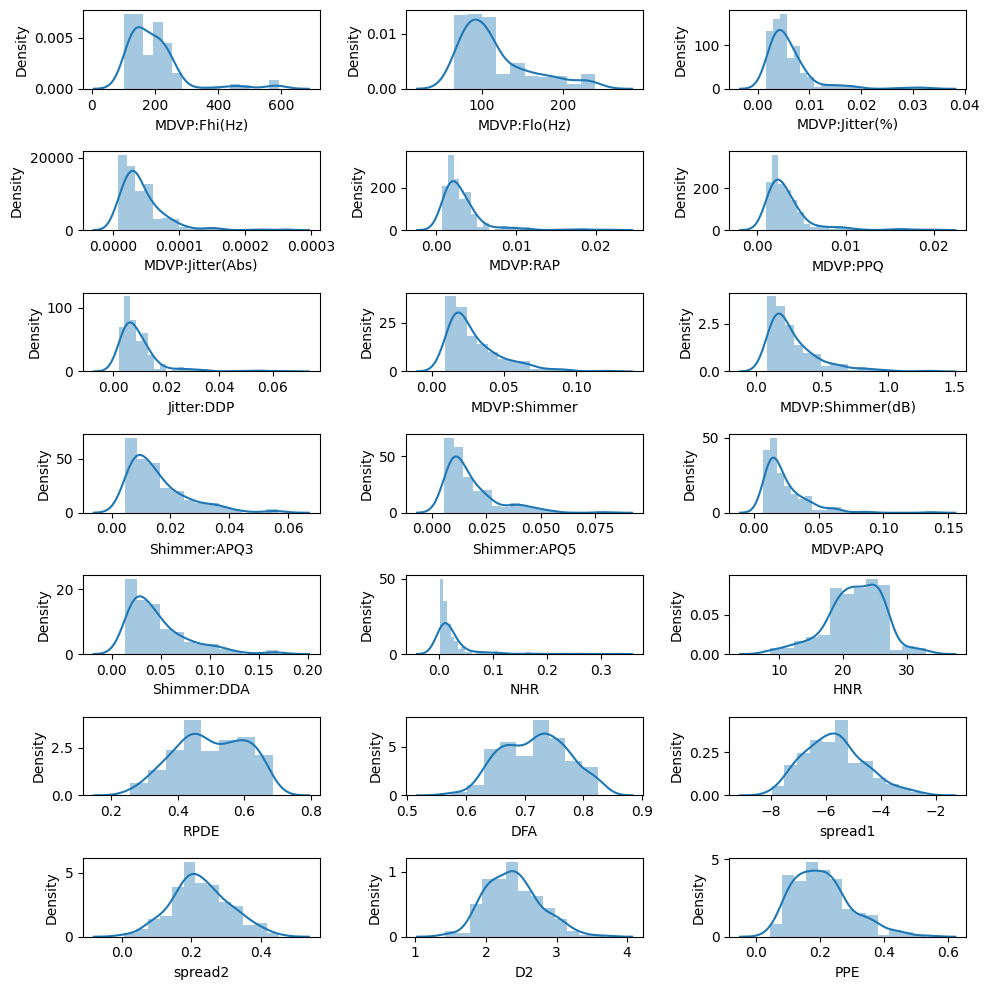

In [12]:
## Checking the distribution of the data
import warnings
warnings.filterwarnings('ignore')

rows = 7
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (10,10))
col = X.columns
index = 1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index = index+1
        
plt.tight_layout()

We have used Distribution plot to check if there is any skewness in the data. From the above subplots, we can see that most of the features are almost normally distributed. However, there are few columns that exhibit the figure of right skewness. Before analysing each of the columns individually, we will check the correlation between the columns with the target variable.

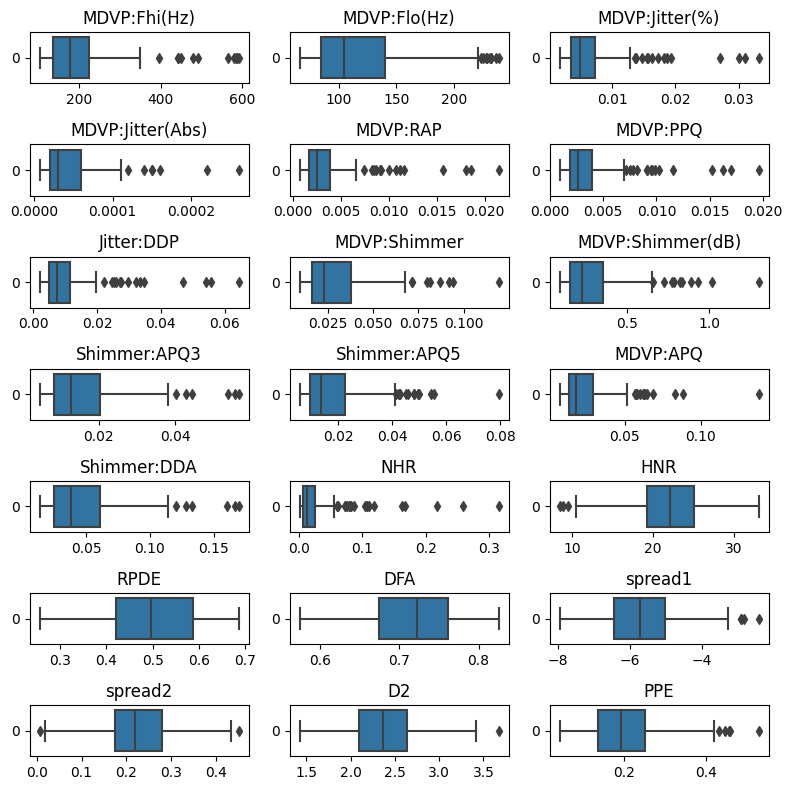

In [13]:
## Checking for outliers
rows = 7
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (8,8))
col = X.columns
index = 1
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df[col[index]], ax=ax[i][j], orient = 'h')
        ax[i][j].set_title(col[index])
        index = index+1
        
plt.tight_layout()


In [14]:
## Dropping the name column
X = df.drop(labels=['name'], axis = 1)


Dropping the name column because it contains an object data type and thus we can't find a correlation for them

In [15]:
## Checking for corelation 
X.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


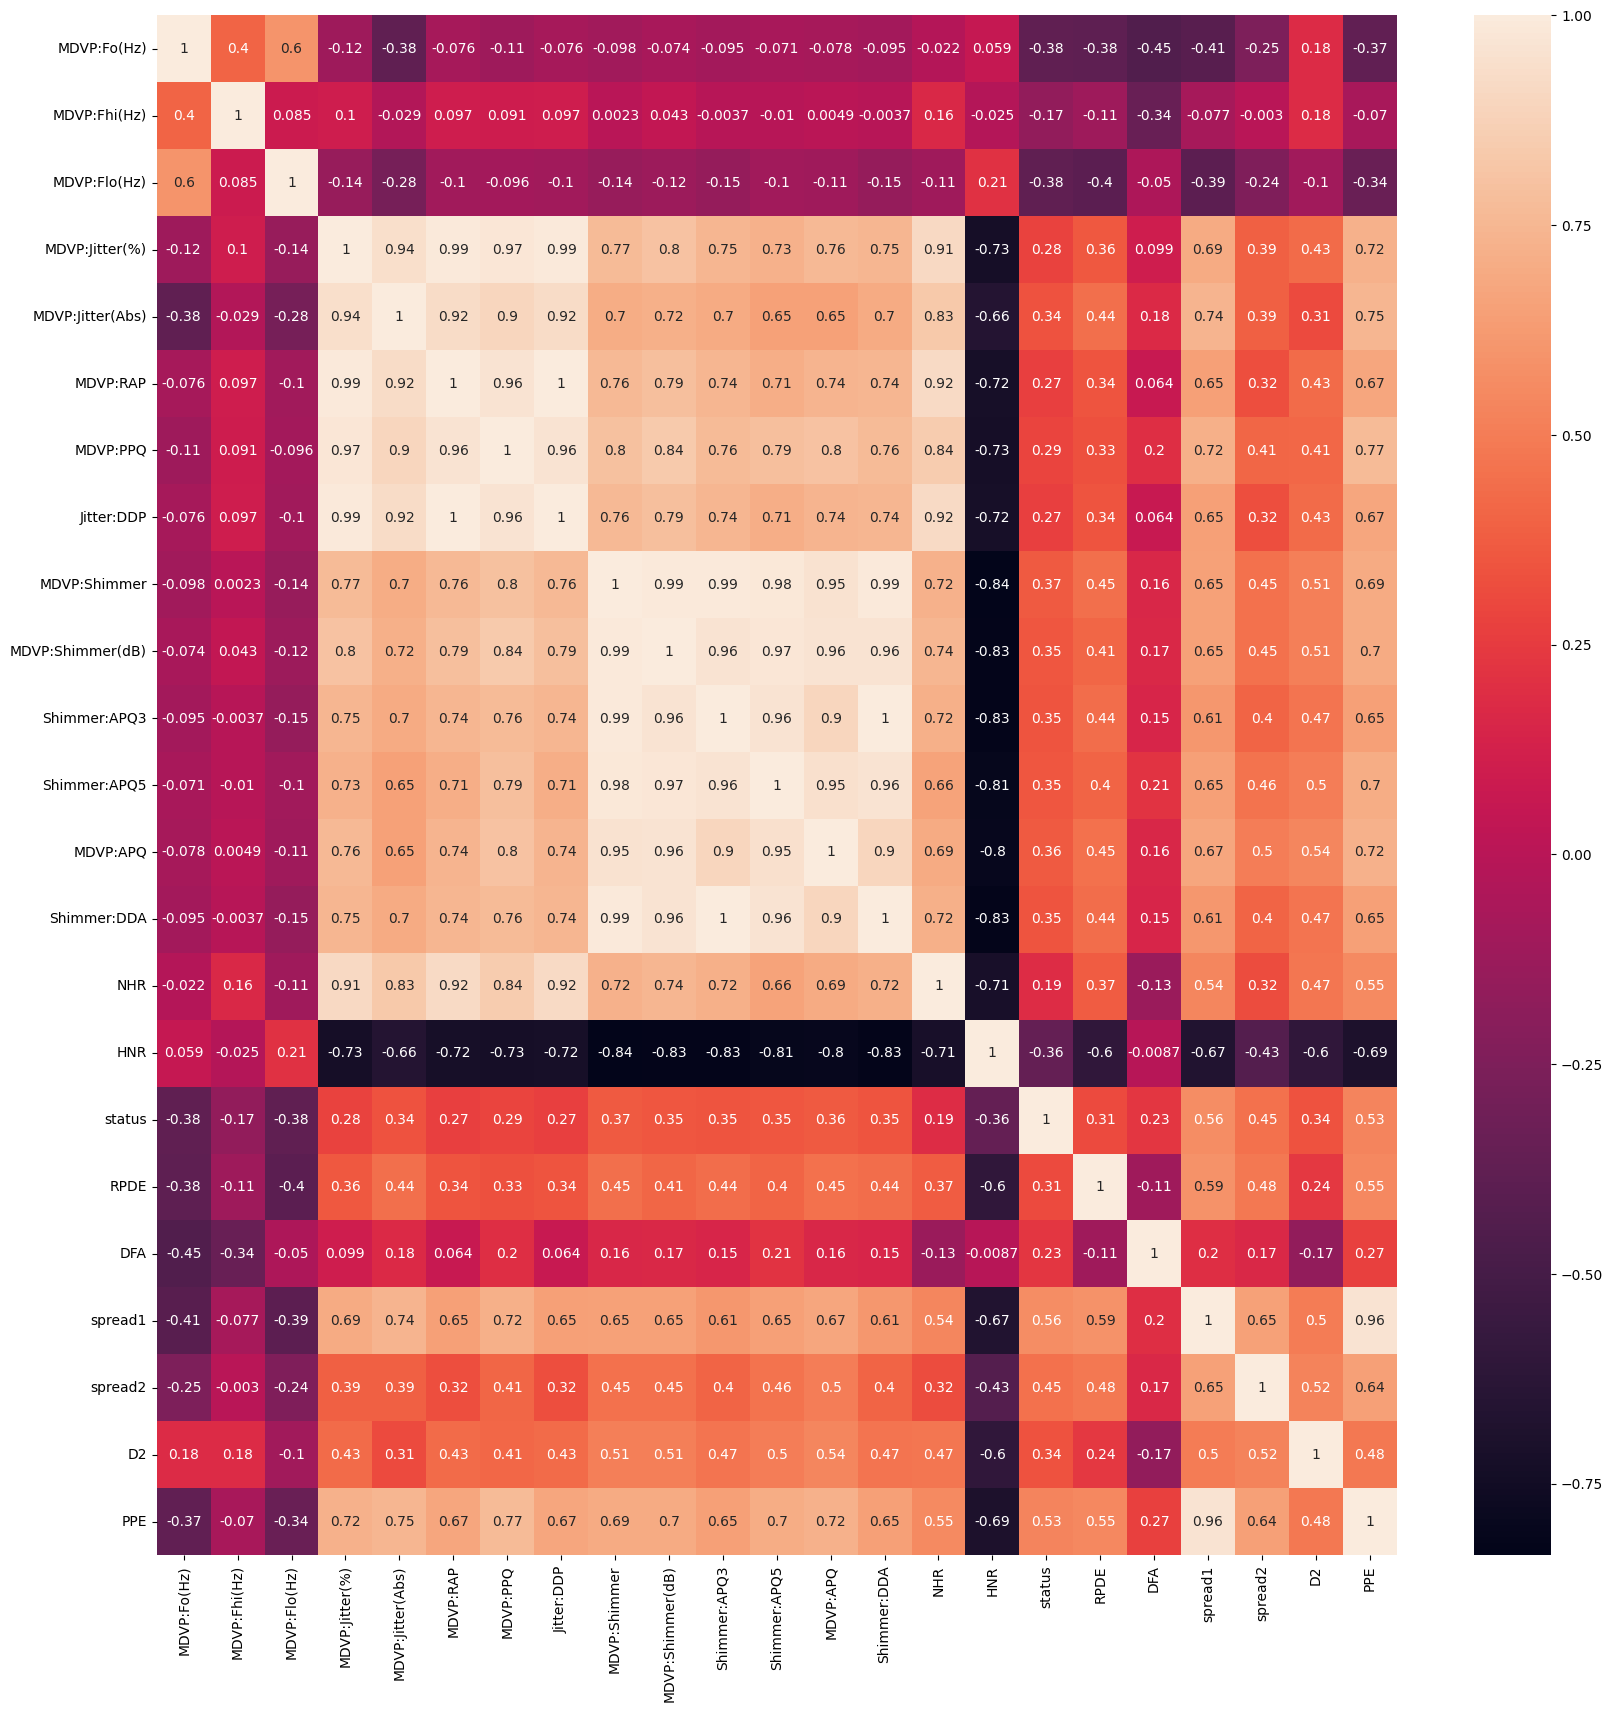

In [16]:
## Visualising using heat map
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot = True)

plt.show()

From the above heatmap, we can clearly see there are a few features which are correlated with each other. We will remove those features whose correlation value is greater than 0.98. The standard practice of correlation is dropping the column which is greater than 0.9, but the dataset used in this project is small, so to make sure we have enough data to train our model, a different approach was taken.

Another noticeable result from the heatmap is that the correlation value of all the features isn't highly correlated with the 'Status' or the target column. Thus, there will be less chance of having bias in the model

In [17]:
def correlation(dataset):
    col_corr = set()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > 0.80:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

A function is defined, which return all the columns which has correlation value greater than 0.90. 

In [18]:
df_subset = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']]
c = len(df_subset)


In [19]:
def plot_barchart(df, features):
    fig, axes = plt.subplots(nrows=1, ncols = len(features), figsize=(15,5))
    for i, column in enumerate(features):
        sns.barplot(x='status', y=column, data=df, ax=axes[i])
        axes[i].set_title(f'Bar Plot for {column}')

    plt.tight_layout()
    plt.show()

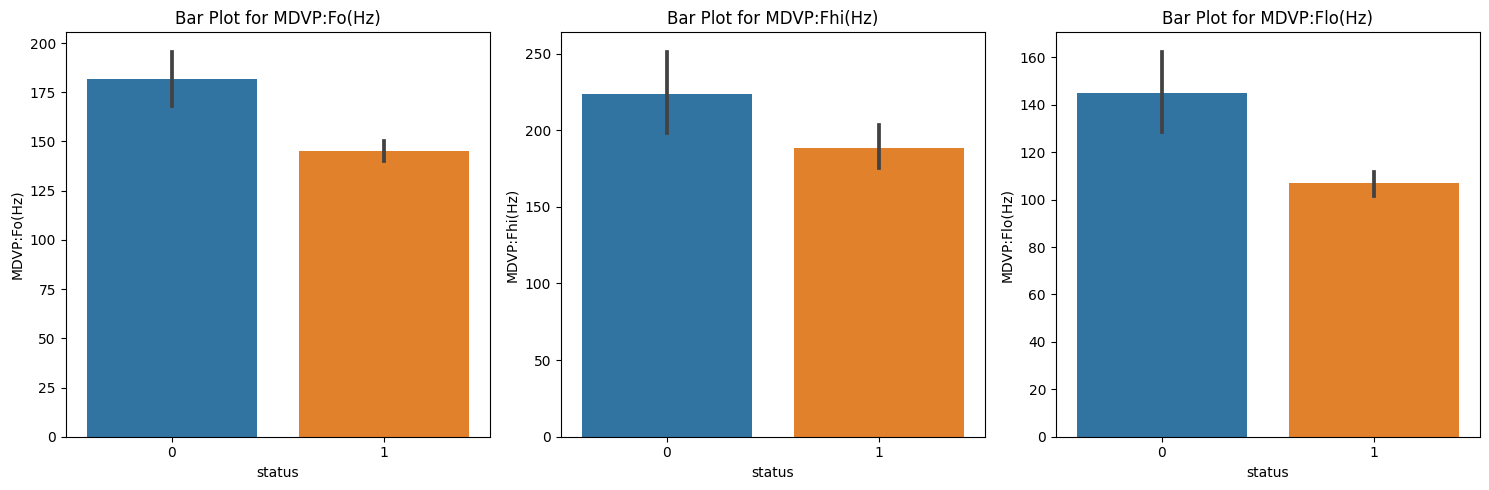

In [20]:
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)']
plot_barchart(df, features)

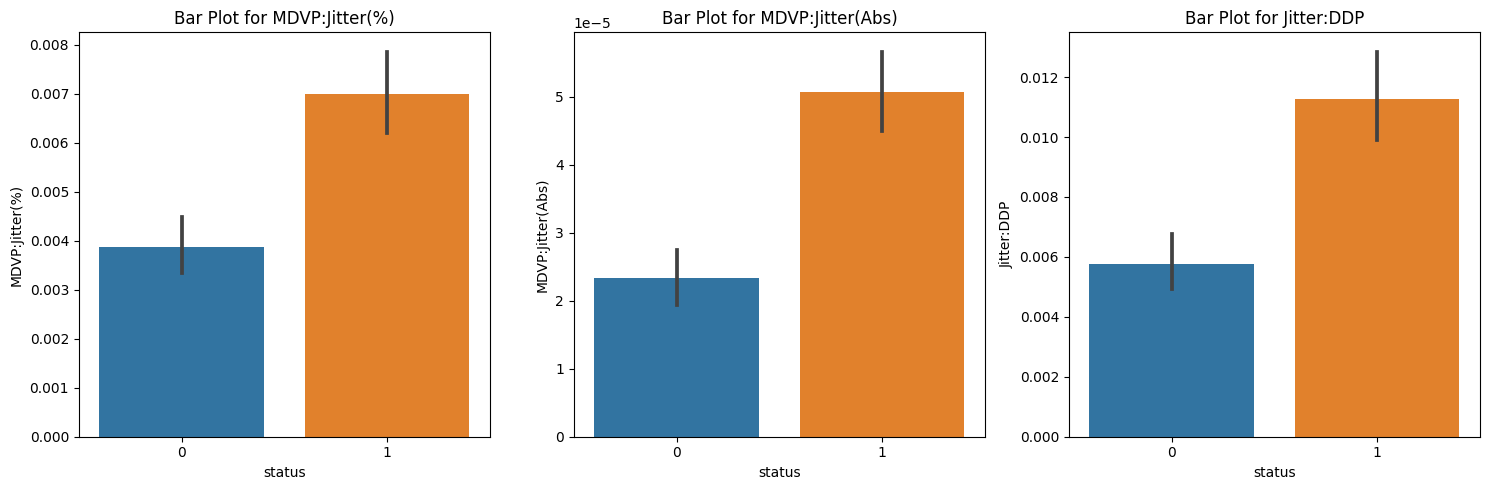

In [21]:
features = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)','Jitter:DDP']
plot_barchart(df,features)

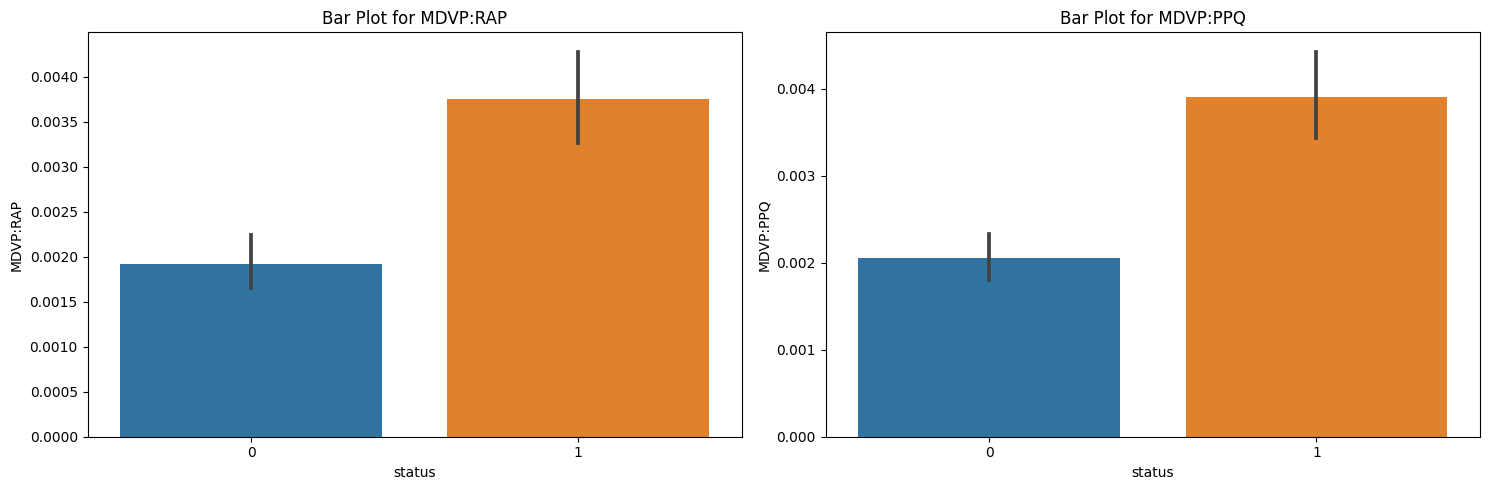

In [22]:
features = ['MDVP:RAP','MDVP:PPQ']
plot_barchart(df,features)


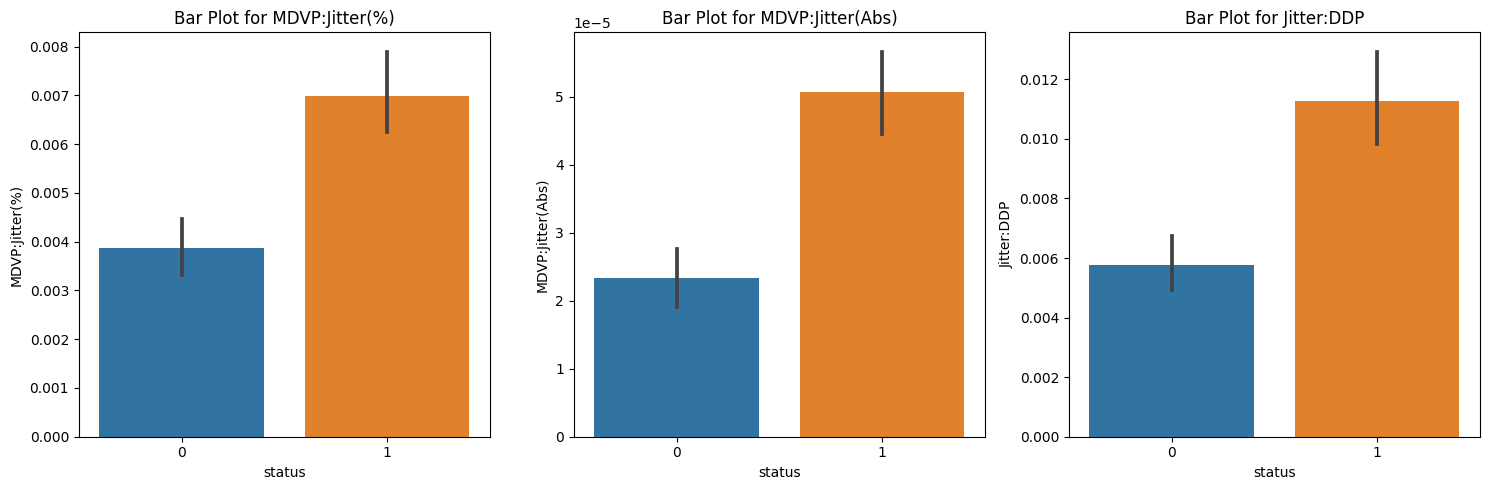

In [23]:
features = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','Jitter:DDP']
plot_barchart(df,features)


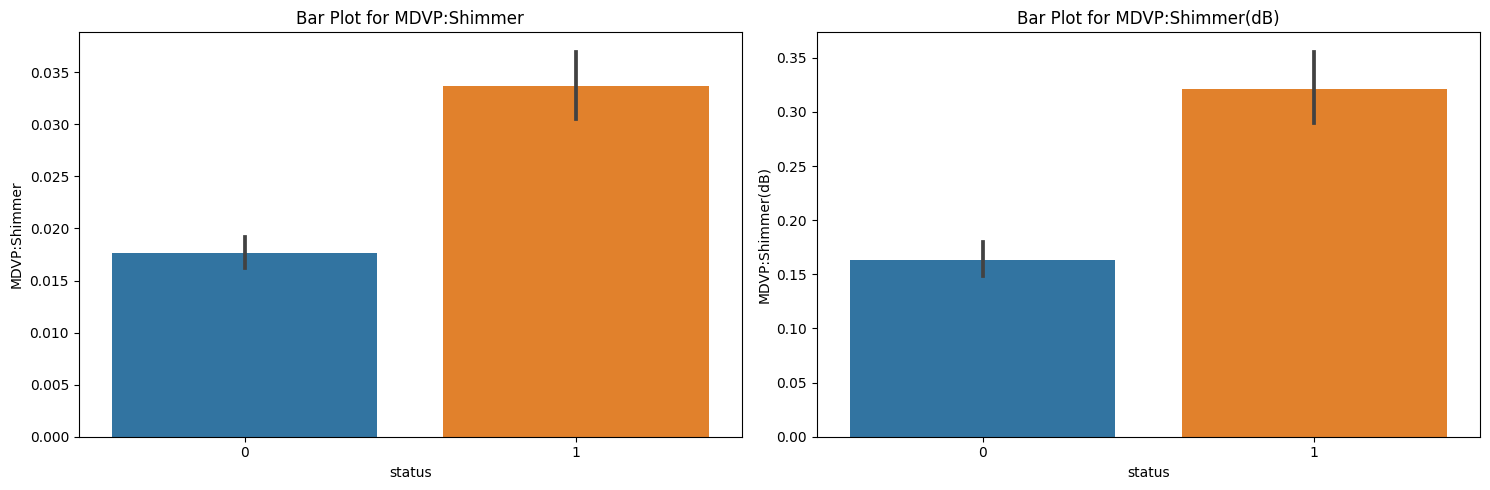

In [24]:
features = ['MDVP:Shimmer','MDVP:Shimmer(dB)']
plot_barchart(df,features)


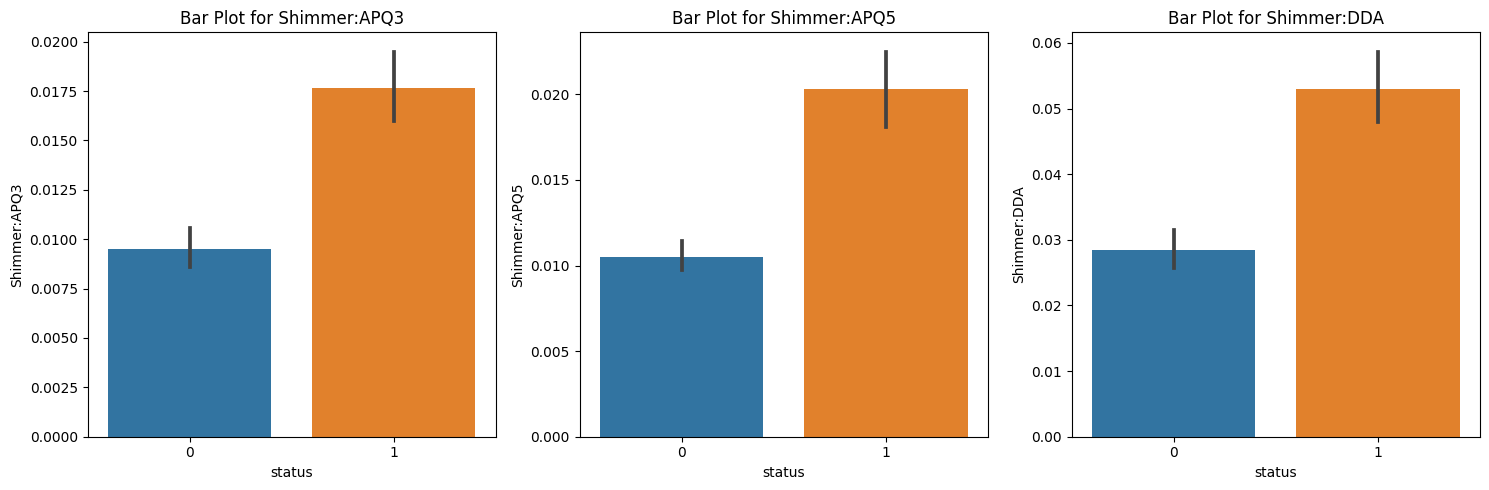

In [25]:
features = ['Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA']
plot_barchart(df,features)

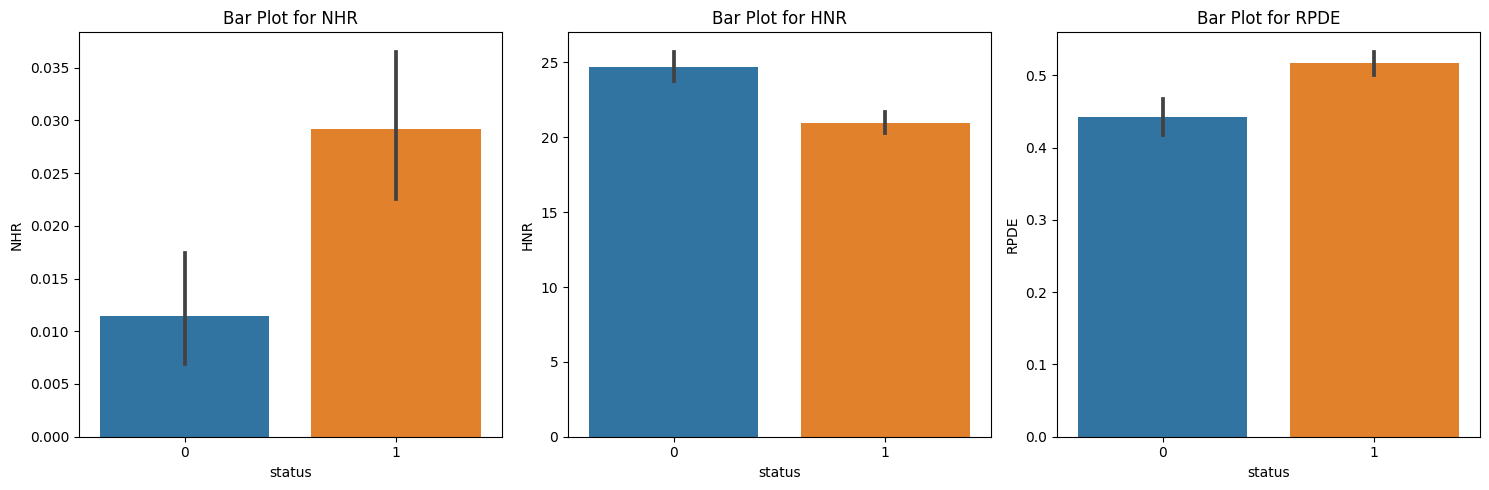

In [26]:
features = ['NHR','HNR','RPDE']
plot_barchart(df,features)

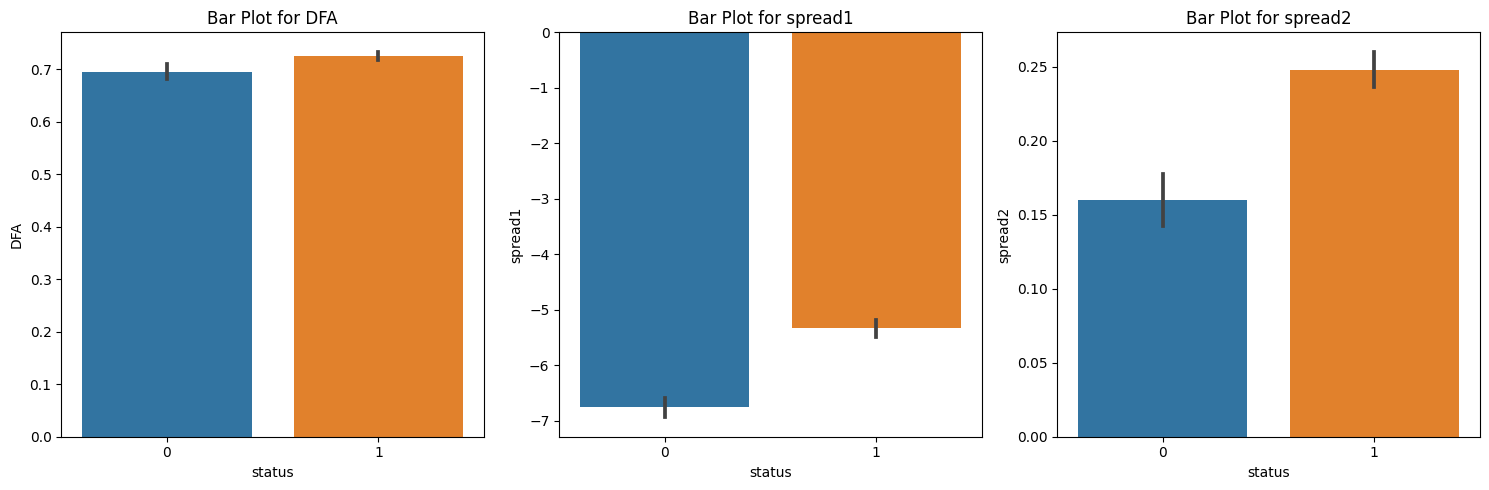

In [27]:
features = ['DFA','spread1','spread2']
plot_barchart(df,features)

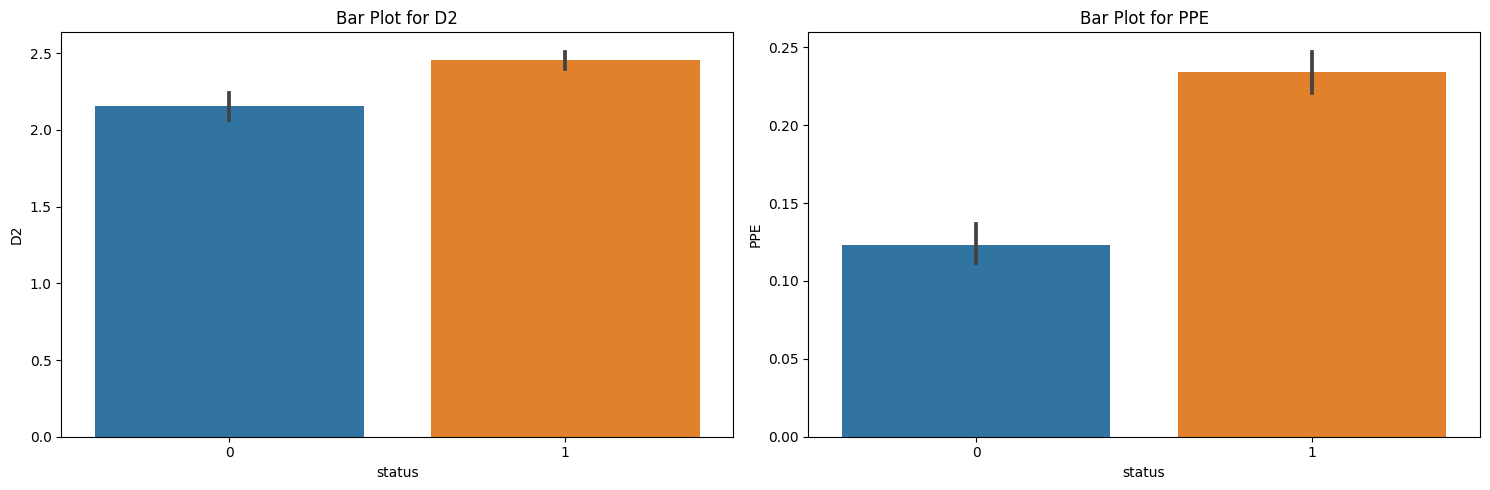

In [28]:
features = ['D2','PPE']
plot_barchart(df,features)

### Feature Engineeering

In [29]:
## Dividing the dependent and independent variables
x = df.drop(['status','name'], axis = 1)
y = df['status']

In [30]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [32]:
"""## Checking the highly corelated value
corr_features = correlation(X)
corr_features"""

'## Checking the highly corelated value\ncorr_features = correlation(X)\ncorr_features'

In [33]:
## Dropping these features
"""x.drop(corr_features,axis=1, inplace = True)"""

'x.drop(corr_features,axis=1, inplace = True)'

In [34]:
## Handling the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)
print(y.value_counts())
print('After random over sampler')
print(y_ros.value_counts())

status
1    147
0     48
Name: count, dtype: int64
After random over sampler
status
1    147
0    147
Name: count, dtype: int64


In [35]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros


We will need to drop this feature from the column to avoid correlation. Before doing that we will split the training and testing dataset

In [36]:
## Applying PCA
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [37]:
# Splitting into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_Test = train_test_split(x_pca, y, test_size = 0.2, random_state = 42)


### Machine Learning Model Selection and Evaluation


#### Logistic Regression

In [38]:
# importing the required library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics

##### Model 1: KNN

In [39]:
## Iterating through different values of k(number of neighbours) 
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, x_train, y_train, cv = 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy')

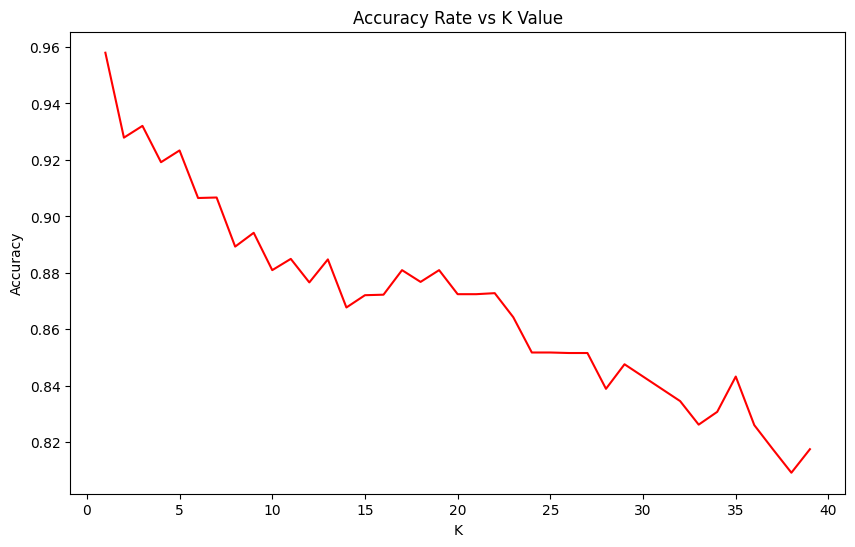

In [40]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), accuracy_rate, color = 'red')
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')


Here, we can clearly see the when k = 1, the accuracy of the model is the highest.

In [41]:
best_weights = None
best_score = 0
for weights in ['uniform','distance']:
    
    KNN = KNeighborsClassifier(n_neighbors = 1, weights = weights)
    KNN = knn.fit(x_train,y_train)
    pred_1 = knn.predict(x_test)
    knn_accuracy = metrics.accuracy_score(y_Test,pred_1)

In [42]:
print(knn_accuracy)

0.8983050847457628


#### Model 2: Logistic Regression



In [43]:
LR = LogisticRegression(C=0.4, max_iter = 1000, solver='liblinear')
LR = LR.fit(x_train,y_train)
pred_2 = LR.predict(x_test)
lr_accuracy = metrics.accuracy_score(y_Test,pred_2)
print(lr_accuracy)

0.864406779661017


#### Model 3: Naive Bayes

In [44]:
NV = GaussianNB()
NV = NV.fit(x_train,y_train)
pred_3 = NV.predict(x_test)
nv_accuracy = metrics.accuracy_score(y_Test,pred_3)
print(nv_accuracy)

0.8983050847457628


#### Model 4: Support Vector Machine


In [45]:
SVM = SVC()
SVM = SVM.fit(x_train,y_train)
pred_4 = SVM.predict(x_test)
svm_accuracy = metrics.accuracy_score(y_Test,pred_4)
print(svm_accuracy)

0.9491525423728814


#### Model 5: Decision Tree Classifier

In [46]:
DTC = DecisionTreeClassifier(random_state=14)
DTC = DTC.fit(x_train,y_train)
pred_5 = DTC.predict(x_test)
dtc_accuracy = metrics.accuracy_score(y_Test,pred_5)
print(dtc_accuracy)

0.9830508474576272


#### Model 6: Random Forest Classifier


In [75]:
RF = RandomForestClassifier(criterion='entropy', random_state=14, max_depth=4,min_samples_split=5,
    bootstrap=False)
RF.fit(x_train, y_train)
prred_6 = RF.predict(x_test)
rf_accuracy = metrics.accuracy_score(y_Test, pred_test)
print(accuracy)

0.9491525423728814


### Model 7: XG-Boost


In [48]:
XGB = XGBClassifier()
XGB = XGB.fit(x_train,y_train)
pred_7 = XGB.predict(x_test)
xgb_accuracy = metrics.accuracy_score(y_Test,pred_7)
print(xgb_accuracy)

1.0


In [49]:
## Combing all the model using voting classifier model. 
from sklearn.ensemble import VotingClassifier
estimators = [
    ('knn', KNN),
    ('lr', LR),
    ('nv', NV),
    ('svm', SVM),
    ('dtc', DTC),
    ('rf', RF),
]
evc = VotingClassifier(estimators = estimators,voting = 'hard', flatten_transform =True)
evc.fit(x_train,y_train)
pred = evc.predict(x_test)
evc_accuracy = metrics.accuracy_score(y_Test,pred)

In [50]:
print(evc_accuracy)

0.9661016949152542


In [51]:
## Visualising the accuracy of the models
name = ['KNN', 'LR', 'NV', 'SVM', 'DTC', 'RF','EVC','XGB']
accuracy = [knn_accuracy, lr_accuracy, nv_accuracy, svm_accuracy, dtc_accuracy, rf_accuracy,evc_accuracy,xgb_accuracy]
df_eval = pd.DataFrame({'Model': name, 'Accuracy': accuracy})
print(df_eval)

  Model  Accuracy
0   KNN  0.898305
1    LR  0.864407
2    NV  0.898305
3   SVM  0.949153
4   DTC  0.983051
5    RF  1.000000
6   EVC  0.966102
7   XGB  1.000000


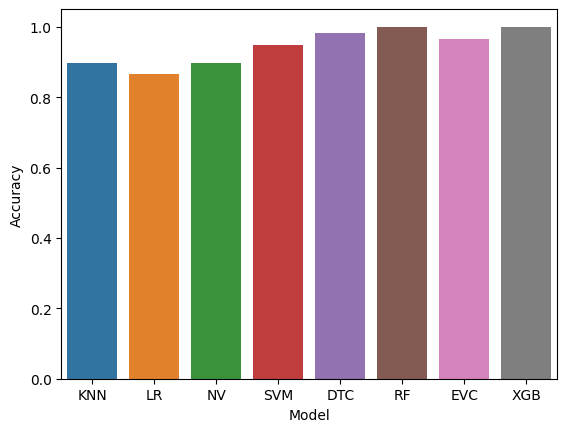

In [52]:
charts = sns.barplot(x='Model', y ='Accuracy', data = df_eval)


After going through the accuracy score of the model, I will further select 3 more models to evaluate using other techniques. 3 Model selected are:
a. KNN
b. RF
c. XGB

In [53]:
### Creating confusion matrix

# For KNN
pred_knn_train = KNN.predict(x_train)
pred_knn_test = KNN.predict(x_test)
print("KNN-Training")
print(classification_report(y_train, pred_knn_train))
print(".........................................")
print("KNN-Test")
print(classification_report(y_Test,pred_knn_test))
# For RF
pred_rf_train = RF_model.predict(x_train)
pred_rf_test = RF_model.predict(x_test)
print('\n')
print("RF-Training")
print(classification_report(y_train, pred_rf_train))
print(".........................................")
print("RF-Test")
print(classification_report(y_Test,pred_rf_test))
print('\n')
# For XGB
pred_xgb_train = XGB.predict(x_train)
pred_xgb_test = XGB.predict(x_test)
print("XGB-Training")
print(classification_report(y_train, pred_xgb_train))
print(".........................................")
print("XGB-Test")
print(classification_report(y_Test,pred_xgb_test))


KNN-Training
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.89      0.77      0.83       118

    accuracy                           0.84       235
   macro avg       0.84      0.84      0.84       235
weighted avg       0.84      0.84      0.84       235

.........................................
KNN-Test
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        29

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



RF-Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       

In [54]:
# Using ROC and AUC Curve
from sklearn.metrics import roc_curve
def plt_roc(model, x_test, y_test):
    y_pred = model.predict_proba(x_test)[:,1]

    fpr,tpr, thresholds = roc_curve(y_Test,y_pred)

    plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


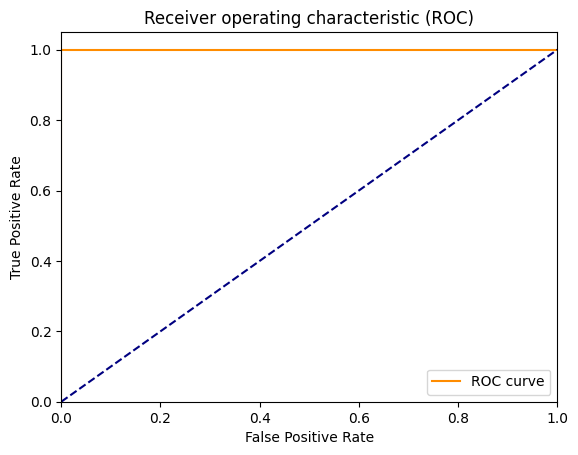

In [55]:
plt_roc(RF,x_test,y_Test)

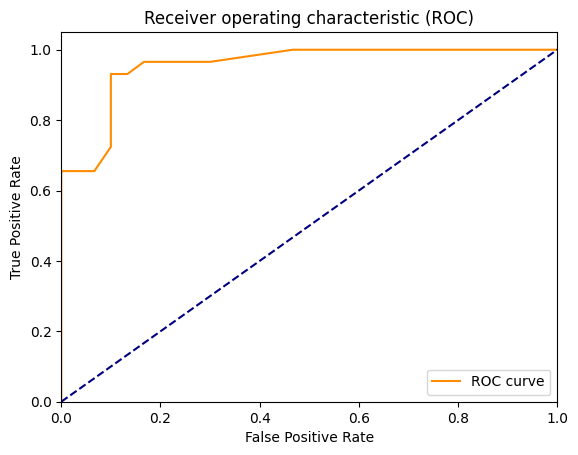

In [56]:
plt_roc(KNN,x_test,y_Test)


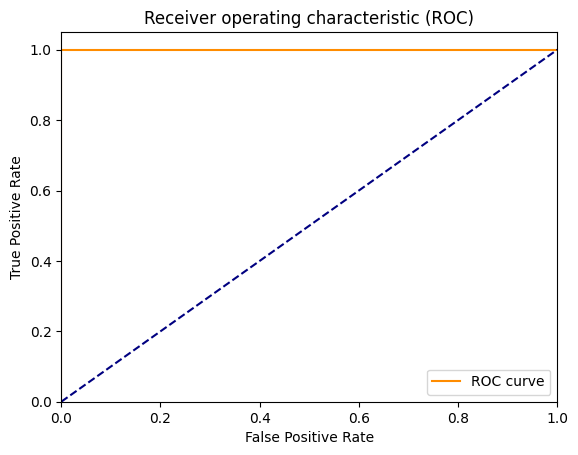

In [57]:
plt_roc(XGB,x_test,y_Test)


Thus, by looking at the accuracy score and ROC/AUC Curve, I have selected Random Forest as a classifer, and Min-Max Scaler was applied on the data. A machine learning pipeline needs to be created, so that the model can be saved and can be used by the user to test whether they have a parkinson syndrome or not by giving their own data as an input to the model

In [99]:
## Creating the pipeline
from sklearn.pipeline import Pipeline
steps = [("standard_scaler", scaler),
         ("PCA", pca),
         ("Classifier", KNN)]

In [100]:
Pipeline(steps)

Pipeline(steps=[('standard_scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('PCA', PCA(n_components=0.95)),
                ('Classifier', KNeighborsClassifier(n_neighbors=39))])

In [101]:
pipe = Pipeline(steps)

In [103]:
## Splitting the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 42)



Please note that I have performed the train-test split again, because the previous train-test split data already takes into account the standard scaler applied to it. Using the same data can cause biasness. However, because of the use of random_state =42, the outcome wouldn't differ

In [104]:
pipe.fit(x_train.values,y_train.values)

Pipeline(steps=[('standard_scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('PCA', PCA(n_components=0.95)),
                ('Classifier', KNeighborsClassifier(n_neighbors=39))])

In [105]:
pred = pipe.predict(x_test)
metrics.accuracy_score(y_test,pred)

0.8813559322033898

In [106]:
model = pipe
import pickle
file = open('new_model.pkl','wb')
pickle.dump(model,file)
